In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('winequality-red.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<function matplotlib.pyplot.show(*args, **kw)>

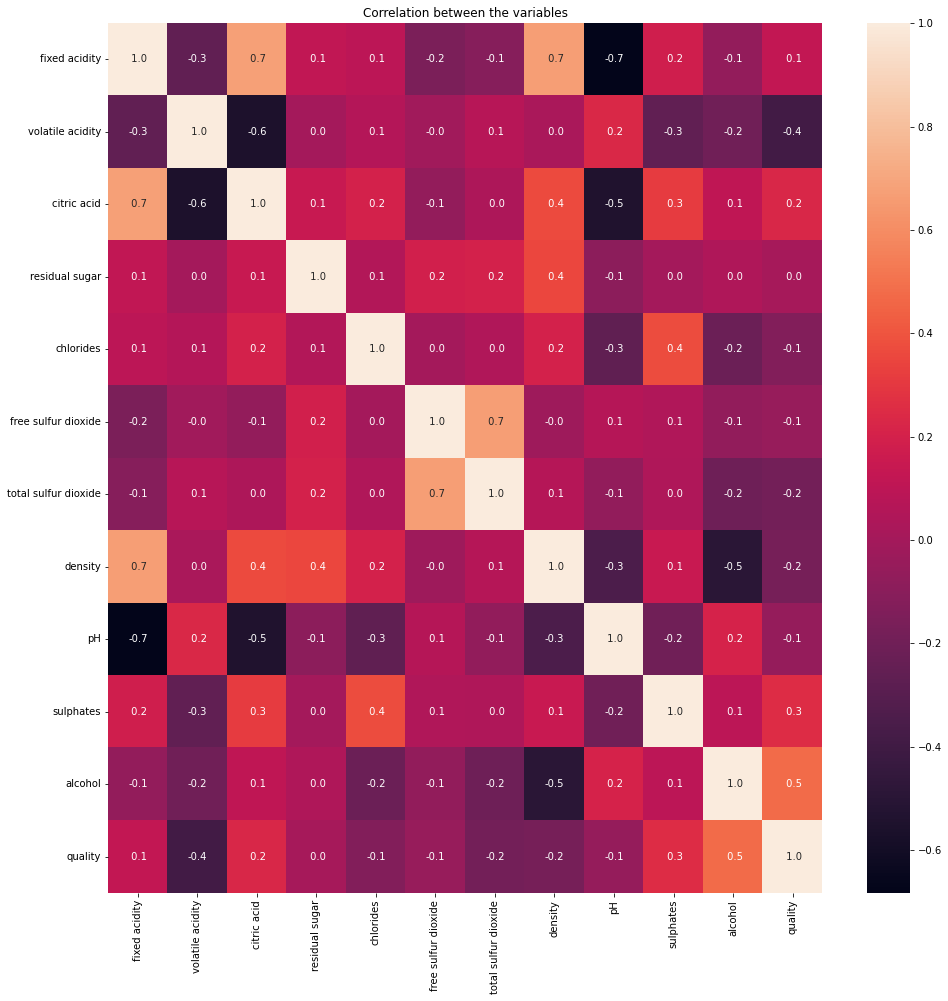

In [5]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, fmt= ' .1f')
plt.title('Correlation between the variables')
plt.show

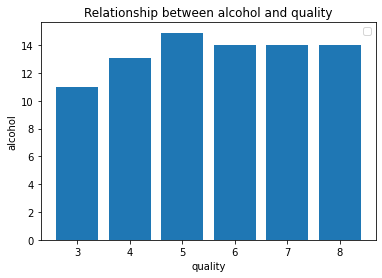

In [6]:
plt.bar(df['quality'], df['alcohol'])
plt.title('Relationship between alcohol and quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

In [7]:
sclr = MinMaxScaler(feature_range=(0,1))
normal_df = sclr.fit_transform(df)
normal_df = pd.DataFrame(normal_df, columns=df.columns)
normal_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [8]:
df["good wine"] = ["yes" if i >=7 else "no" for i in df ['quality']]

In [9]:
X = normal_df.drop(['quality'], axis = 1)
Y = df['good wine']

In [10]:
Y.value_counts()

no     1382
yes     217
Name: good wine, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42, stratify = Y)

In [12]:
dummy_classifier = DummyClassifier(strategy='most_frequent',random_state=42)

dummy_classifier.fit(X_train,y_train)

acc_baseline = dummy_classifier.score(X_test,y_test)

print("Baseline Accuracy = ", acc_baseline)

Baseline Accuracy =  0.865625


In [13]:
svc = SVC(random_state=42)
svc.fit(X_train,y_train)

SVC(random_state=42)